# Predicting MLB Players Salaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

In [3]:
batting = pd.read_csv('core/Batting.csv')
pitching = pd.read_csv('core/Pitching.csv')
salaries = pd.read_csv('core/Salaries.csv')
all_star = pd.read_csv('core/AllStarFull.csv')

# Data Wrangling

In [4]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [5]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,106673.000000,105061.000000,83888.000000,107429.000000,105329.000000,70778.000000,104612.000000,101360.000000,71325.000000,81988.000000
mean,1966.552141,1.079206,51.134098,140.454551,18.639818,36.714863,6.254261,1.260619,2.864785,16.929664,2.948135,1.192960,12.948785,20.677297,1.072664,1.063874,2.225345,1.036775,2.926404
std,39.549982,0.287394,47.015896,184.286687,28.161252,52.399701,9.667879,2.608268,6.396150,26.336778,7.649862,2.699623,20.683452,28.606481,2.731013,2.299923,4.175046,1.943212,4.698823
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1936.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,47.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,80.000000,228.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2019.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [6]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [7]:
salaries.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


After inspection of the Salary data, we see that it only containes salaries 1985 and after

In [8]:
all_star.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933.0,0.0,ALS193307060,NYA,AL,1,1.0
1,ferreri01,1933.0,0.0,ALS193307060,BOS,AL,1,2.0
2,gehrilo01,1933.0,0.0,ALS193307060,NYA,AL,1,3.0
3,gehrich01,1933.0,0.0,ALS193307060,DET,AL,1,4.0
4,dykesji01,1933.0,0.0,ALS193307060,CHA,AL,1,5.0


In [9]:
all_star.describe()

,yearID,gameNum,GP,startingPos
count,5374.000000,5374.000000,5375.000000,1691.000000
mean,1978.629512,0.097507,0.780465,5.125370
std,24.866550,0.394194,0.413970,2.657291
min,1933.000000,0.000000,0.000000,1.000000
25%,1959.000000,0.000000,1.000000,3.000000
50%,1979.000000,0.000000,1.000000,5.000000
75%,2001.000000,0.000000,1.000000,7.000000
max,2019.000000,2.000000,1.000000,10.000000


Remove pitchers data

In [10]:
pitchers = np.unique(pitching.playerID)
pitchers = pd.DataFrame(pitchers)

In [11]:
pitchers

,0
0,aardsda01
1,aasedo01
2,abadfe01
3,abbeybe01
4,abbeych01
...,...
9840,zoldasa01
9841,zuberbi01
9842,zumayjo01
9843,zuverge01


In [12]:
pitchers.columns = ['playerID']
all_df = pd.merge(batting, pitchers, how='outer', on='playerID', indicator=True)
batting_stats = all_df[all_df['_merge'] == 'left_only']
batting_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,left_only
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,left_only
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0,left_only
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,...,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0,left_only
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107413,waltodo01,2019,1,SEA,AL,7,16,2,3,0,...,0.0,1.0,3,5.0,0.0,0.0,0.0,0.0,0.0,left_only
107418,wongke01,2019,1,TBA,AL,6,14,1,3,0,...,0.0,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0,left_only
107419,wongke01,2019,2,LAA,AL,1,4,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,left_only
107423,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,...,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0,left_only


Remove any players statistics before the year 1985 and after 2016 because there is no salary data for them

In [25]:
batting_stats = batting_stats[batting_stats.yearID > 1984]
batting_stats = batting_stats[batting_stats.yearID < 2017]
batting_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge
47356,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only
47357,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only
47433,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only
48114,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only
48115,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105967,valaipa01,2016,1,COL,NL,13,19,3,5,1,...,0.0,0.0,0,8.0,0.0,0.0,0.0,0.0,0.0,left_only
105972,vogelda01,2016,1,SEA,AL,8,12,0,1,0,...,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0,left_only
105976,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only
105984,wendljo01,2016,1,OAK,AL,28,96,11,25,1,...,2.0,0.0,6,16.0,0.0,0.0,0.0,2.0,3.0,left_only


In [26]:
batting_sal = pd.merge(batting_stats, salaries)
batting_sal

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,...,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500


In [27]:
batting_sal.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.00000,12329.000000,1.232900e+04
mean,2000.288669,1.006327,96.153703,313.081191,43.153865,83.888799,16.250466,1.799254,9.654068,41.294509,6.254441,2.648796,31.210074,56.718225,2.668748,2.888474,1.912402,2.70395,7.184443,2.285519e+06
std,8.825493,0.085208,46.030116,189.846077,31.403513,56.052862,11.852286,2.291220,10.068848,31.879355,9.887397,3.333790,24.967474,38.026210,4.162843,3.456362,2.908364,2.52469,5.635567,3.749212e+06
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.00000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.00000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,483.000000,67.000000,130.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.00000,11.000000,2.550000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.00000,35.000000,3.300000e+07


Remove any player who made under the minimum salary of 60K since 1985

In [29]:
batting_sal = batting_sal[batting_sal.salary > 60000]
batting_sal

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,...,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500


Remove any player who never had an AtBat

In [31]:
batting_sal = batting_sal[batting_sal.AB > 0]
batting_sal.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,12258.000000,1.225800e+04
mean,2000.354381,1.006037,96.378610,313.888481,43.267662,84.112580,16.301354,1.800702,9.686654,41.427150,6.257954,2.650840,31.307554,56.870697,2.677925,2.899413,1.911894,2.713738,7.204846,2.298155e+06
std,8.793761,0.083546,45.926178,189.670625,31.403431,56.031615,11.851639,2.291054,10.079789,31.892027,9.853203,3.328419,24.982432,38.005423,4.170574,3.460602,2.905108,2.526687,5.636935,3.756354e+06
min,1985.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.250000e+04
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.000000,6.000000,6.300000e+05
75%,2008.000000,1.000000,138.000000,484.000000,67.000000,131.000000,25.000000,3.000000,15.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.000000,11.000000,2.600000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,109.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07


Add AllStar appearences as a feature

In [37]:
all_star['allStar'] = 1
batting_all = pd.merge(batting_sal, all_star, how='left', on=['playerID','yearID'])
batting_all

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000,NaN
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000,NaN
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000,NaN
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500,NaN
12255,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500,NaN
12256,storytr01,2016,1,COL,NL,97,372,67,101,21,...,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500,NaN
12257,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500,NaN


In [38]:
batting_all = batting_all.fillna({'allStar':0})
batting_all

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000,0.0
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000,0.0
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000,0.0
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500,0.0
12255,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500,0.0
12256,storytr01,2016,1,COL,NL,97,372,67,101,21,...,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500,0.0
12257,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500,0.0


Add amount of years played in MLB as a feature

In [45]:
batting_all['Years Played'] = batting_all.groupby('playerID').cumcount() + 1
batting_all.sort_values(by=['playerID', 'yearID'])

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,_merge,salary,allStar,Years Played
8867,abadan01,2006,1,CIN,NL,5,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,left_only,327000,0.0,1
7244,abbotje01,1998,1,CHA,AL,89,244,33,68,14,...,28.0,1.0,0.0,2.0,5.0,2.0,left_only,175000,0.0,1
7245,abbotje01,1999,1,CHA,AL,17,57,5,9,0,...,12.0,0.0,0.0,1.0,1.0,4.0,left_only,255000,0.0,2
7246,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,38.0,1.0,2.0,2.0,1.0,2.0,left_only,255000,0.0,3
7247,abbotje01,2001,1,FLO,NL,28,42,5,11,3,...,7.0,0.0,1.0,0.0,0.0,1.0,left_only,300000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,zuninmi01,2014,1,SEA,AL,131,438,51,87,20,...,158.0,1.0,17.0,0.0,4.0,12.0,left_only,504100,0.0,1
12122,zuninmi01,2015,1,SEA,AL,112,350,28,61,11,...,132.0,0.0,5.0,8.0,2.0,6.0,left_only,523500,0.0,2
4930,zupcibo01,1991,1,BOS,AL,18,25,3,4,0,...,6.0,0.0,0.0,1.0,0.0,0.0,left_only,100000,0.0,1
4931,zupcibo01,1992,1,BOS,AL,124,392,46,108,19,...,60.0,1.0,4.0,7.0,4.0,6.0,left_only,109000,0.0,2


#Do i need to count for salary inflation?

# EDA

Text(0.5, 1.0, 'PDF of Games Played')

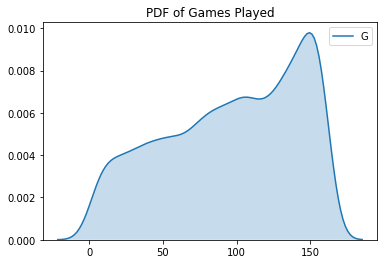

In [48]:
sns.kdeplot(batting_all.G, shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

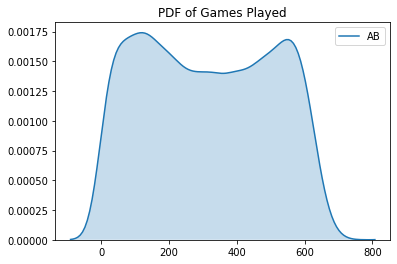

In [49]:
sns.kdeplot(batting_all.AB, shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

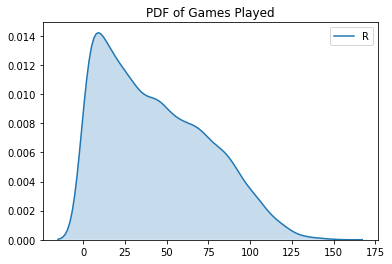

In [50]:
sns.kdeplot(batting_all.R, shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

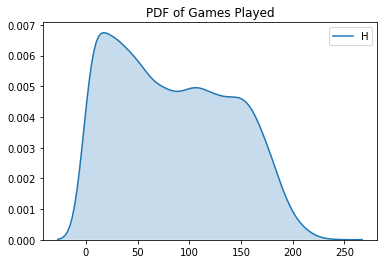

In [51]:
sns.kdeplot(batting_all.H, shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

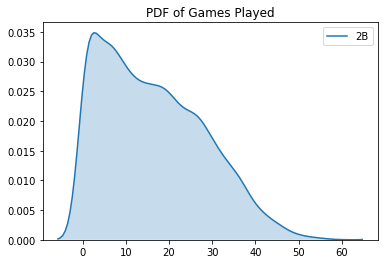

In [54]:
sns.kdeplot(batting_all['2B'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

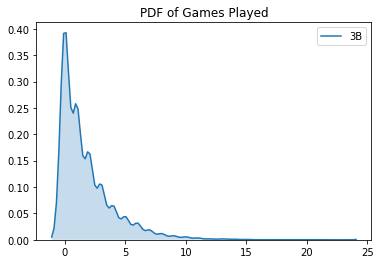

In [55]:
sns.kdeplot(batting_all['3B'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

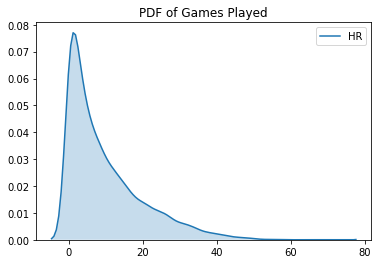

In [56]:
sns.kdeplot(batting_all['HR'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

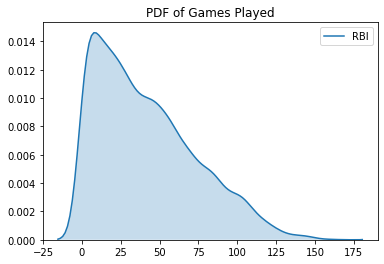

In [57]:
sns.kdeplot(batting_all['RBI'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

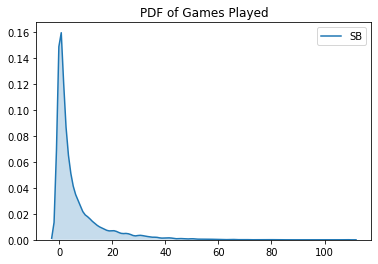

In [58]:
sns.kdeplot(batting_all['SB'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

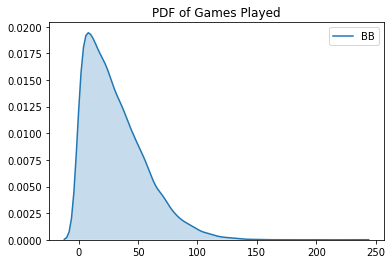

In [59]:
sns.kdeplot(batting_all['BB'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

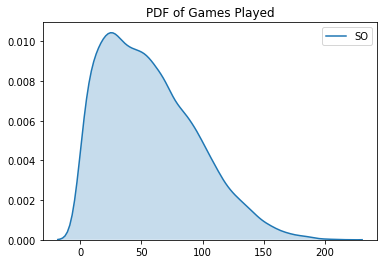

In [60]:
sns.kdeplot(batting_all['SO'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

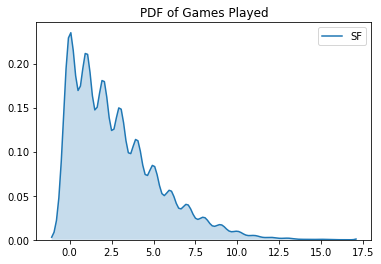

In [61]:
sns.kdeplot(batting_all['SF'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

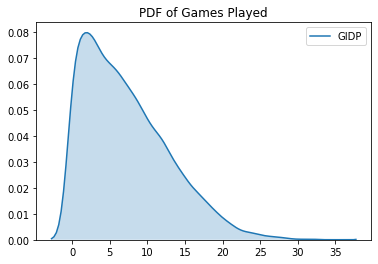

In [62]:
sns.kdeplot(batting_all['GIDP'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

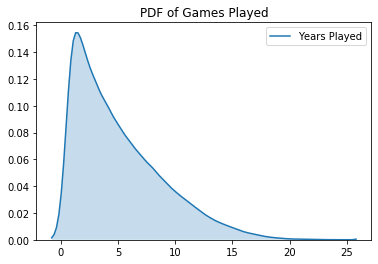

In [64]:
sns.kdeplot(batting_all['Years Played'], shade=True)
plt.title("PDF of ")

Text(0.5, 1.0, 'PDF of Games Played')

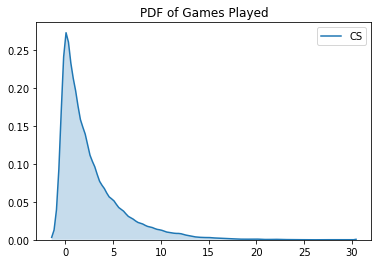

In [65]:
sns.kdeplot(batting_all['CS'], shade=True)
plt.title("PDF of ")